In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
df = pd.read_csv('LUNGCANCER.csv')
#drop labels that doesn't seem to be very helpful
df = df.drop(labels=['index','Patient Id','Gender'], axis=1)
#convert string type into float(int)
df = df.replace('Low',0)
df = df.replace('Medium',1)
df = df.replace('High',2)
df

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,2,4,5,4,3,2,2,4,3,...,3,4,2,2,3,1,2,3,4,0
1,17,3,1,5,3,4,2,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,4,5,6,5,5,4,6,7,2,...,8,7,9,2,1,4,6,7,2,2
3,37,7,7,7,7,6,7,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,6,8,7,7,7,6,7,7,8,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,6,8,7,7,7,6,7,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,4,5,6,5,5,4,6,7,2,...,8,7,9,2,1,4,6,7,2,2
998,18,6,8,7,7,7,6,7,7,8,...,3,2,4,1,4,2,4,2,3,2


In [45]:
df.groupby('Level').mean()

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Level,,,,,,,,,,,,,,,,,,,,,
0,35.412541,2.600660,2.231023,3.112211,3.000000,2.732673,3.092409,3.000000,2.409241,3.023102,...,2.861386,2.171617,2.501650,2.498350,2.574257,2.759076,2.468647,2.366337,2.914191,2.141914
1,38.620482,2.933735,4.198795,5.442771,4.716867,4.292169,3.963855,3.512048,3.903614,2.454819,...,3.846386,3.487952,4.415663,4.632530,4.756024,4.159639,4.936747,3.674699,3.695783,3.310241
2,37.320548,5.693151,6.830137,6.616438,6.479452,6.375342,5.827397,6.619178,6.682192,6.073973,...,7.438356,5.589041,4.468493,5.328767,3.884932,4.189041,4.208219,4.380822,4.775342,3.227397


In [46]:
df.groupby('Level').var()

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Level,,,,,,,,,,,,,,,,,,,,,
0,147.057723,1.234039,1.588836,2.755579,2.324503,2.050816,2.878849,2.456954,1.110113,3.161716,...,2.848272,0.804887,2.575328,2.105130,1.053242,2.706664,1.402159,1.160055,2.111818,1.055953
1,169.396316,3.512212,7.023805,2.144751,4.149201,4.279938,2.578750,3.090489,1.900047,2.786472,...,1.761830,2.244567,5.053289,4.003531,1.876852,5.759937,8.337377,3.682379,3.305964,2.335484
2,115.009604,1.625365,1.339199,0.841487,0.964549,0.674665,1.005841,0.401280,1.008611,4.662095,...,1.285338,5.621858,4.441999,5.089417,6.772437,5.499880,4.126855,3.033148,5.042797,2.231115


In [47]:
df.groupby('Level').sum()

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Level,,,,,,,,,,,,,,,,,,,,,
0,10730,788,676,943,909,828,937,909,730,916,...,867,658,758,757,780,836,748,717,883,649
1,12822,974,1394,1807,1566,1425,1316,1166,1296,815,...,1277,1158,1466,1538,1579,1381,1639,1220,1227,1099
2,13622,2078,2493,2415,2365,2327,2127,2416,2439,2217,...,2715,2040,1631,1945,1418,1529,1536,1599,1743,1178


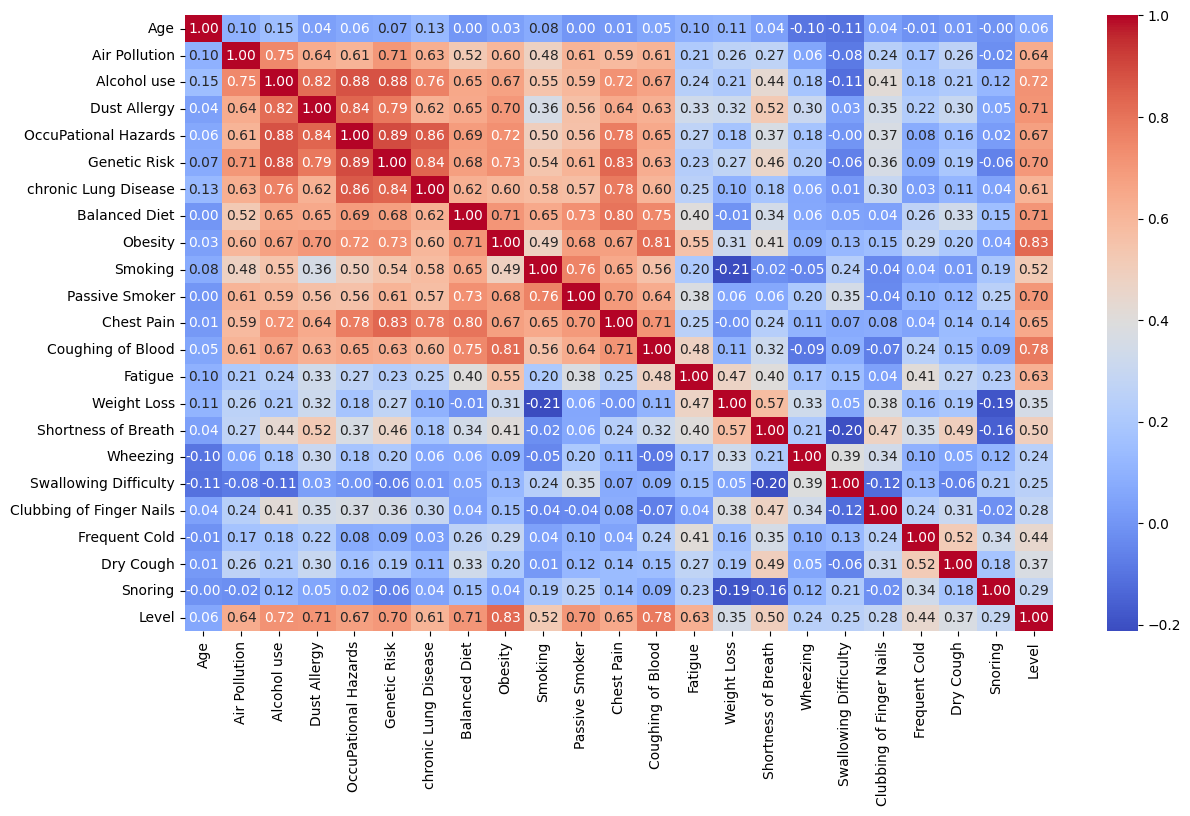

In [48]:
fig = plt.figure(figsize=(14, 8))
corr = df.corr()
seaborn.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

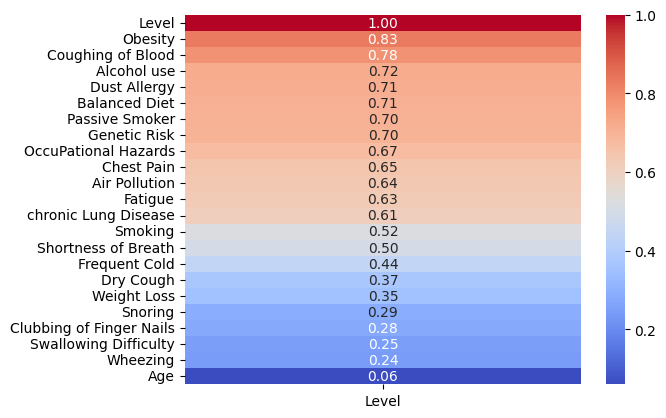

In [49]:
corr_lungcancer = corr['Level'].sort_values(ascending=False).to_frame()
seaborn.heatmap(corr_lungcancer, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [50]:
y = df.Level
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

